In [55]:
# Librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold, cross_validate, cross_val_predict, cross_val_score, StratifiedKFold, RepeatedStratifiedKFold
import joblib

### 1. Carga de los datos


In [56]:
data_top10=pd.read_csv('../../Data/data_top10.csv') # to read data from github
data_top10.head(3)

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,MI,FT,Data Scientist,111740,North America,0,North America,M
1,SE,FT,Data Scientist,115000,North America,100,North America,M
2,SE,FT,Machine Learning Engineer,112000,North America,0,North America,M


#### 4. Alternativas para el manejo del problema de regresión como clasificacion:

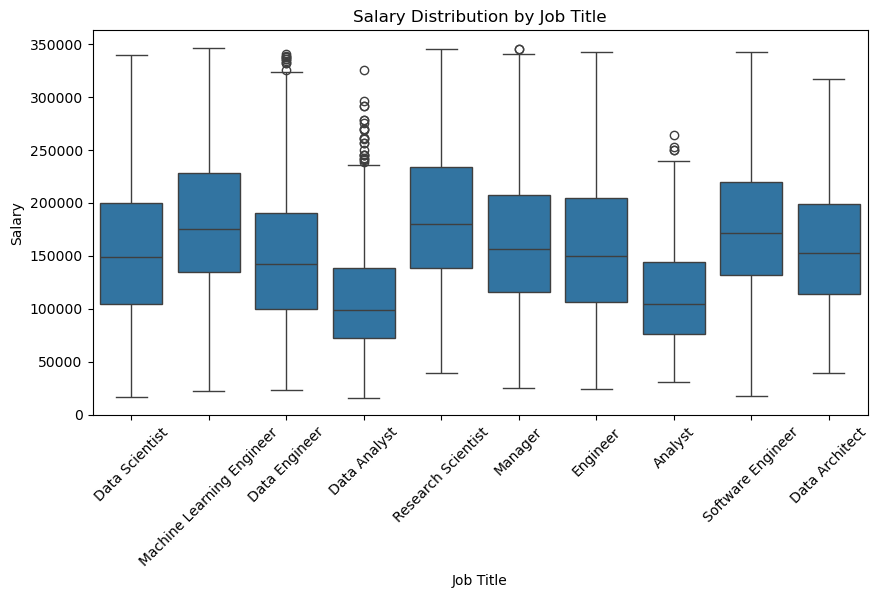

In [57]:
# Boxplot job_title vs. Salary
plt.figure(figsize=(10, 5))
sns.boxplot(data=data_top10, x='job_title', y='salary_in_usd')
plt.title('Salary Distribution by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.xticks(rotation=45)  
plt.show()

#### 4.1 Opcion 1: Clases = Rangos de salarios

In [58]:
# función para clasificar rangos de salarios
def classify_salary(salary):
    if salary < 75000:
        return 'Bajo'
    elif 75000 <= salary < 120000:
        return 'Medio_Bajo'
    elif 120000 <= salary < 180000:
        return 'Medio_Alto'
    else:
        return 'Alto'

In [59]:
# Mapeo Opcion 1 salary_class
data_top10['salary_class'] = data_top10['salary_in_usd'].apply(classify_salary)
data_top10.head(3)

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_class
0,MI,FT,Data Scientist,111740,North America,0,North America,M,Medio_Bajo
1,SE,FT,Data Scientist,115000,North America,100,North America,M,Medio_Bajo
2,SE,FT,Machine Learning Engineer,112000,North America,0,North America,M,Medio_Bajo


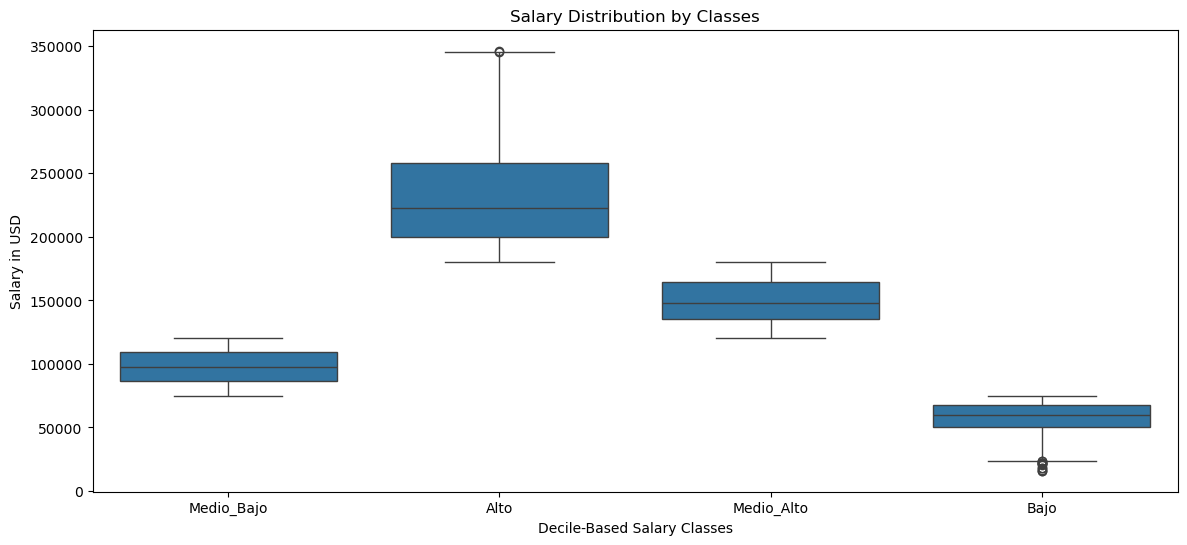

In [60]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data_top10, x='salary_class', y='salary_in_usd')
plt.title('Salary Distribution by Classes')
plt.xlabel('Decile-Based Salary Classes')
plt.ylabel('Salary in USD')
plt.show()

#### 4.2 Opcion 2: Clases = Quantiles

In [61]:
# Calculate the quantiles
quantiles = data_top10['salary_in_usd'].quantile([0.333, 0.666])

# Define the function to classify based on quantiles
def classify_salary_quantiles(salary):
    if salary <= quantiles[0.333]:
        return 'D33.3'
    elif quantiles[0.333] < salary <= quantiles[0.666]:
        return 'D66.6'
    else:
        return 'D100'


In [62]:
# Mapear 
data_top10['salary_quantiles'] = data_top10['salary_in_usd'].apply(classify_salary_quantiles)
data_top10.head(3)

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_class,salary_quantiles
0,MI,FT,Data Scientist,111740,North America,0,North America,M,Medio_Bajo,D33.3
1,SE,FT,Data Scientist,115000,North America,100,North America,M,Medio_Bajo,D33.3
2,SE,FT,Machine Learning Engineer,112000,North America,0,North America,M,Medio_Bajo,D33.3


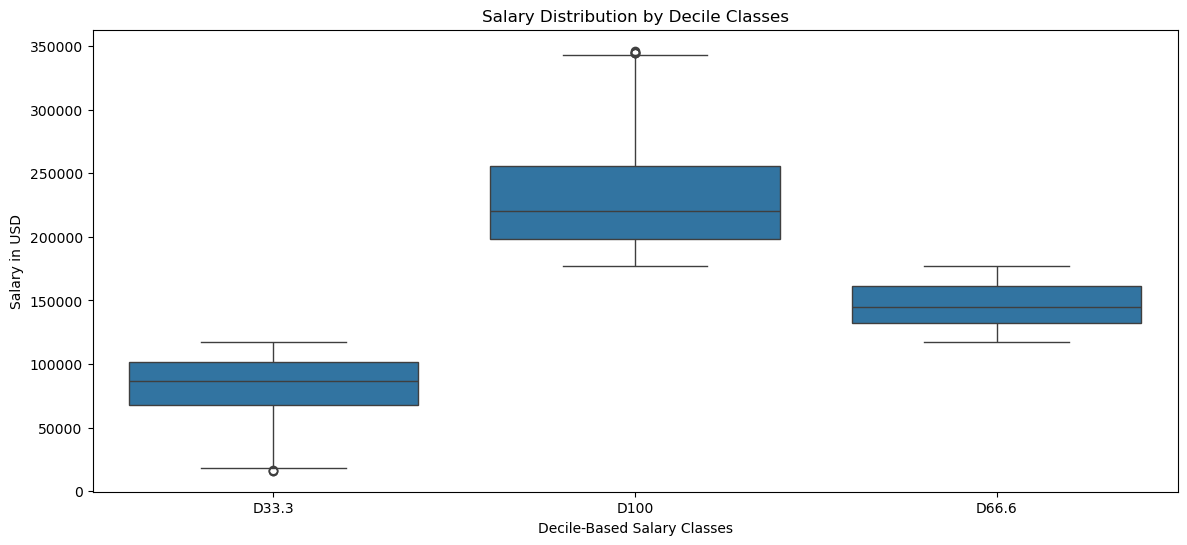

In [63]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data_top10, x='salary_quantiles', y='salary_in_usd')
plt.title('Salary Distribution by Decile Classes')
plt.xlabel('Decile-Based Salary Classes')
plt.ylabel('Salary in USD')
plt.show()

#### 5.  Separación Entrenamiento y Prueba

In [64]:
data_top10.columns

Index(['experience_level', 'employment_type', 'job_title', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size', 'salary_class', 'salary_quantiles'],
      dtype='object')

In [65]:
data_top10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11193 entries, 0 to 11192
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   experience_level    11193 non-null  object
 1   employment_type     11193 non-null  object
 2   job_title           11193 non-null  object
 3   salary_in_usd       11193 non-null  int64 
 4   employee_residence  11193 non-null  object
 5   remote_ratio        11193 non-null  int64 
 6   company_location    11193 non-null  object
 7   company_size        11193 non-null  object
 8   salary_class        11193 non-null  object
 9   salary_quantiles    11193 non-null  object
dtypes: int64(2), object(8)
memory usage: 874.6+ KB


In [66]:
# Treat 'remote_ratio' as a categorical feature by converting it to 'object' type
data_top10['remote_ratio'] = data_top10['remote_ratio'].astype(str)

In [67]:
# Eliminación columnas redundantes
columns_to_drop_classification = ['salary_in_usd', 'salary_class', 'salary_quantiles',
                                   'employment_type', 'company_size','remote_ratio']

In [ ]:
# sample for classification
y = data_top10['salary_quantiles']
X = data_top10.drop(columns_to_drop_classification, axis=1)

In [69]:
# Encode the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) 

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

#### 6. Modelos

In [71]:
#pip install catboost


In [72]:
#pip install XGBoost

In [73]:
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from scipy.stats import uniform, randint
from random import random, seed
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold, cross_validate, cross_val_predict, cross_val_score, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, recall_score, average_precision_score, f1_score, classification_report, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance

import time
import warnings 
#warnings.filterwarnings("ignore")


In [142]:
# Funcion Random_Search
#kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=52)
from sklearn.model_selection import RepeatedStratifiedKFold
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=52)
                                
def random_search(pipeline, param_grid, X_train, y_train, cv=kfold, n_iter=30, scoring="accuracy"): 
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_grid,
        n_iter=n_iter,
        cv=cv,
        verbose=1,
        random_state=42,
        n_jobs=-1,
        scoring=scoring
    )
    start_time = time.time()
    random_search.fit(X_train, y_train)
    end_time = time.time()
    elapsed_time = (end_time - start_time) / 60  # Time in minutes
    
    return random_search, elapsed_time

In [75]:
def report_best_scores(results, n_top=3):
    # Esta función espera una instancia de resultados de búsqueda de cross validation, por ejemplo: search.cv_results_
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
    # Retorna los parámetros del mejor modelo basado en accuracy.
    return list(results.sort_values("rank_test_score")['params'])[0]

def see_results(results):
    # Esta función espera una instancia de pandas dataframe de los resultados de búsqueda de cross validation, por ejemplo: pd.DataFrame(search.cv_results_)
    display(results[results.columns.drop(list(results.filter(regex='split')))].sort_values("rank_test_score"))

In [76]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Set up OneHotEncoder for categorical features
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

##### XGBoost

In [77]:
# Initialize the XGBoost model
#xgb_model = XGBClassifier(objective="multi:softmax", num_class=3, eval_metric="mlogloss")
xgb_model = XGBClassifier(objective="multi:softmax",  num_class=3, eval_metric="merror")

# Create a pipeline with preprocessing and model
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('classifier', xgb_model)
])

# Define parameter grid for random search
param_grid_xgb = {
    'classifier__n_estimators': randint(50, 501),
    'classifier__max_depth': randint(3, 16),
    'classifier__learning_rate': uniform(0.001, 0.299),
    'classifier__reg_lambda': uniform(0, 1),
    'classifier__reg_alpha': uniform(0, 1)
}

In [78]:
# Fit the RandomizedSearchCV
rs_xgb, elapsed_time_xgb = random_search(pipeline_xgb, param_grid_xgb, X_train, y_train)

Fitting 15 folds for each of 50 candidates, totalling 750 fits


In [79]:
print(f"Tiempo de entrenamiento {elapsed_time_xgb:.2f} minutos")

Tiempo de entrenamiento 0.88 minutos


In [80]:
# Ver resultados
see_results(pd.DataFrame(rs_xgb.cv_results_))
best_models_params_xgb= report_best_scores(pd.DataFrame(rs_xgb.cv_results_))
best_models_params_xgb

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__reg_alpha,param_classifier__reg_lambda,params,mean_test_score,std_test_score,rank_test_score
45,0.221770,0.013302,0.035483,0.006007,0.073314,14,86,0.882636,0.188707,{'classifier__learning_rate': 0.07331383497923...,0.505658,0.006860,1
12,0.150019,0.008532,0.025967,0.004941,0.290906,12,93,0.939499,0.894827,{'classifier__learning_rate': 0.29090580370160...,0.505323,0.007157,2
42,0.505356,0.049741,0.084948,0.014074,0.207590,9,387,0.837710,0.675690,{'classifier__learning_rate': 0.20759038369263...,0.505323,0.007022,2
20,0.343285,0.078538,0.054893,0.008639,0.200984,7,148,0.591298,0.274722,{'classifier__learning_rate': 0.20098353454641...,0.505286,0.007077,4
28,0.387011,0.043225,0.070416,0.031055,0.125536,13,177,0.807440,0.896091,{'classifier__learning_rate': 0.12553647441323...,0.505212,0.007107,5
0,0.445395,0.036034,0.076367,0.007969,0.112987,15,320,0.731994,0.598658,{'classifier__learning_rate': 0.11298749553536...,0.505174,0.007157,6
11,0.196763,0.029538,0.037431,0.004442,0.226853,8,103,0.546710,0.184854,{'classifier__learning_rate': 0.22685306168497...,0.505137,0.006932,7
8,0.122940,0.018644,0.020718,0.003263,0.284717,14,63,0.808397,0.304614,{'classifier__learning_rate': 0.28471677563874...,0.505100,0.007151,8
26,0.324809,0.022886,0.057716,0.009460,0.282913,9,236,0.694785,0.880468,{'classifier__learning_rate': 0.28291321759683...,0.505025,0.007090,9
25,0.633617,0.045650,0.118964,0.028224,0.042660,9,286,0.539841,0.203061,{'classifier__learning_rate': 0.04266010486735...,0.504951,0.007006,10


Model with rank: 1
Mean validation score: 0.506 (std: 0.007)
Parameters: {'classifier__learning_rate': 0.07331383497923505, 'classifier__max_depth': 14, 'classifier__n_estimators': 86, 'classifier__reg_alpha': 0.8826363431893397, 'classifier__reg_lambda': 0.18870710834137938}

Model with rank: 2
Mean validation score: 0.505 (std: 0.007)
Parameters: {'classifier__learning_rate': 0.290905803701603, 'classifier__max_depth': 12, 'classifier__n_estimators': 93, 'classifier__reg_alpha': 0.9394989415641891, 'classifier__reg_lambda': 0.8948273504276488}

Model with rank: 2
Mean validation score: 0.505 (std: 0.007)
Parameters: {'classifier__learning_rate': 0.2075903836926373, 'classifier__max_depth': 9, 'classifier__n_estimators': 387, 'classifier__reg_alpha': 0.837710105907328, 'classifier__reg_lambda': 0.6756901170392807}



{'classifier__learning_rate': 0.07331383497923505,
 'classifier__max_depth': 14,
 'classifier__n_estimators': 86,
 'classifier__reg_alpha': 0.8826363431893397,
 'classifier__reg_lambda': 0.18870710834137938}

In [81]:
# Best parameters and score
best_params_xgb = rs_xgb.best_params_
best_score_xgb = rs_xgb.best_score_

print(f"Best Parameters XGB: {best_params_xgb}")
print(f"Best Cross-Validation Score XGB: {best_score_xgb:.4f}")

# Test score 
test_acc_xgb = rs_xgb.score(X_test, y_test)
print(f"Test Accuracy XGB): {test_acc_xgb:.4f}")

Best Parameters XGB: {'classifier__learning_rate': 0.07331383497923505, 'classifier__max_depth': 14, 'classifier__n_estimators': 86, 'classifier__reg_alpha': 0.8826363431893397, 'classifier__reg_lambda': 0.18870710834137938}
Best Cross-Validation Score XGB: 0.5057
Test Accuracy XGB): 0.5132


In [82]:
best_xgb_model = rs_xgb.best_estimator_

# Evaluate the best model on the test set
y_pred = best_xgb_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

        D100       0.49      0.76      0.59       727
       D33.3       0.60      0.63      0.62       750
       D66.6       0.39      0.17      0.23       762

    accuracy                           0.51      2239
   macro avg       0.49      0.52      0.48      2239
weighted avg       0.49      0.51      0.48      2239



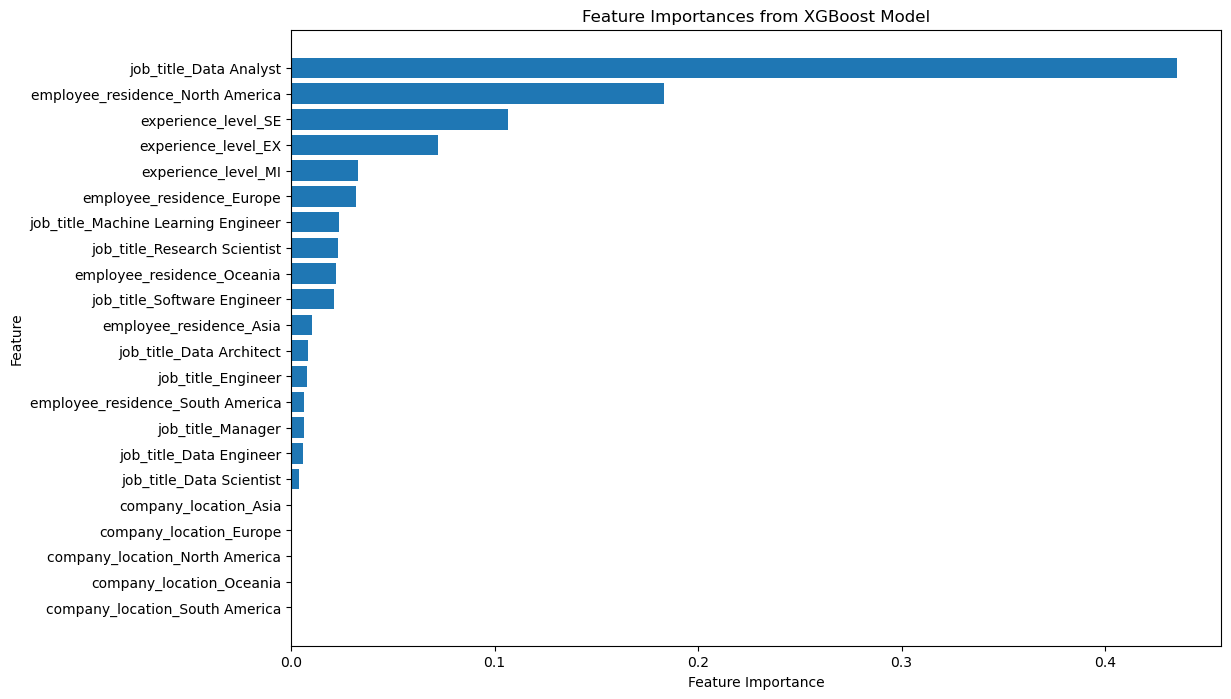

In [83]:
# Extract feature importances
feature_imp_xgb = best_xgb_model.named_steps['classifier'].feature_importances_

# Access the OneHotEncoder within the pipeline's preprocessor
onehot_encoder = best_xgb_model.named_steps['preprocessor'].transformers_[0][1]
feature_names = onehot_encoder.get_feature_names_out(input_features=categorical_cols)

# Create a DataFrame to hold feature names and their importances
imp_xgb_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_imp_xgb})

# Sort by importance for better readability in the plot
imp_xgb_df = imp_xgb_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(imp_xgb_df['Feature'], imp_xgb_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances from XGBoost Model")
plt.gca().invert_yaxis()
plt.show()

In [84]:
# Save the best model
# joblib.dump(best_xgb_model, 'best_xgb_model_3qua.pkl')  

##### RandomForest

In [85]:
# Initialize the RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# Create a pipeline with preprocessing and model
pipeline_rf = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('classifier', rf_model)
])

# Define parameter grid for random search
param_grid_rf = {
    'classifier__n_estimators': randint(50, 500),
    'classifier__max_depth': randint(5, 21),
    'classifier__min_samples_split': randint(2, 10),
    'classifier__min_samples_leaf': randint(1, 5),
    'classifier__max_features': ['sqrt', 'log2', None],
    'classifier__bootstrap': [True, False]
}

In [86]:
# Fit the RandomizedSearchCV
rs_rf, elapsed_time_rf = random_search(pipeline_rf, param_grid_rf, X_train, y_train)
print(f"Tiempo de entrenamiento {elapsed_time_rf:.2f} minutos")

Fitting 15 folds for each of 50 candidates, totalling 750 fits
Tiempo de entrenamiento 1.92 minutos


In [98]:
# Ver resultados
see_results(pd.DataFrame(rs_rf.cv_results_))
best_models_params_rf= report_best_scores(pd.DataFrame(rs_rf.cv_results_))
best_models_params_rf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__bootstrap,param_classifier__max_depth,param_classifier__max_features,param_classifier__min_samples_leaf,param_classifier__n_estimators,params,mean_test_score,std_test_score,rank_test_score
2,0.643044,0.030787,0.029577,0.004827,True,15,sqrt,4,201,"{'classifier__bootstrap': True, 'classifier__m...",0.505621,0.006844,1
29,0.903376,0.027410,0.037547,0.004767,True,19,log2,2,228,"{'classifier__bootstrap': True, 'classifier__m...",0.505621,0.006727,2
16,1.129279,0.050788,0.036185,0.003863,True,20,None,4,264,"{'classifier__bootstrap': True, 'classifier__m...",0.505547,0.006957,3
48,2.549068,0.096931,0.106324,0.017018,True,19,log2,4,421,"{'classifier__bootstrap': True, 'classifier__m...",0.505509,0.006798,4
40,1.296814,0.041248,0.034677,0.004909,False,12,None,3,209,"{'classifier__bootstrap': False, 'classifier__...",0.505472,0.007648,5
32,0.840924,0.046599,0.035198,0.003981,True,15,sqrt,4,209,"{'classifier__bootstrap': True, 'classifier__m...",0.505435,0.006781,6
28,1.617694,0.046467,0.066130,0.006013,True,19,log2,3,442,"{'classifier__bootstrap': True, 'classifier__m...",0.505398,0.006434,7
31,1.150558,0.053682,0.046100,0.004253,False,18,sqrt,3,286,"{'classifier__bootstrap': False, 'classifier__...",0.505360,0.006871,8
42,2.327951,0.174592,0.106917,0.028252,True,14,log2,3,436,"{'classifier__bootstrap': True, 'classifier__m...",0.505323,0.006453,9
37,0.937965,0.040018,0.031322,0.004951,True,13,None,2,165,"{'classifier__bootstrap': True, 'classifier__m...",0.505063,0.007170,10


Model with rank: 1
Mean validation score: 0.506 (std: 0.007)
Parameters: {'classifier__bootstrap': True, 'classifier__max_depth': 15, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 9, 'classifier__n_estimators': 201}

Model with rank: 2
Mean validation score: 0.506 (std: 0.007)
Parameters: {'classifier__bootstrap': True, 'classifier__max_depth': 19, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 228}

Model with rank: 3
Mean validation score: 0.506 (std: 0.007)
Parameters: {'classifier__bootstrap': True, 'classifier__max_depth': 20, 'classifier__max_features': None, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 7, 'classifier__n_estimators': 264}



{'classifier__bootstrap': True,
 'classifier__max_depth': 15,
 'classifier__max_features': 'sqrt',
 'classifier__min_samples_leaf': 4,
 'classifier__min_samples_split': 9,
 'classifier__n_estimators': 201}

In [87]:
# Best parameters and score
best_params_rf = rs_rf.best_params_
best_score_rf = rs_rf.best_score_

print(f"Best Parameters RandomForest: {best_params_rf}")
print(f"Best Cross-Validation Score RandomForest: {best_score_rf:.4f}")

# Test score 
test_acc_rf = rs_rf.score(X_test, y_test)
print(f"Test Accuracy RandomForest): {test_acc_rf:.4f}")
best_rf_model = rs_rf.best_estimator_


Best Parameters RandomForest: {'classifier__bootstrap': True, 'classifier__max_depth': 15, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 9, 'classifier__n_estimators': 201}
Best Cross-Validation Score RandomForest: 0.5056
Test Accuracy RandomForest): 0.5141


In [88]:

# Evaluate the best model on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

        D100       0.49      0.76      0.59       727
       D33.3       0.60      0.63      0.62       750
       D66.6       0.39      0.17      0.23       762

    accuracy                           0.51      2239
   macro avg       0.49      0.52      0.48      2239
weighted avg       0.49      0.51      0.48      2239



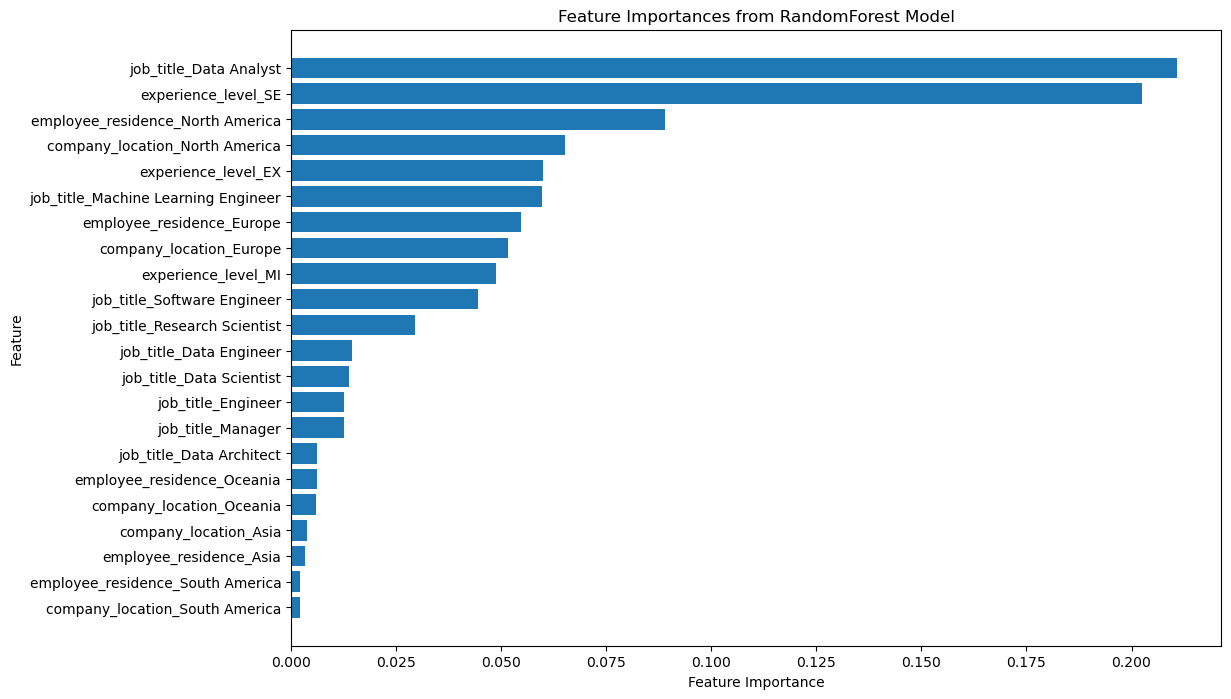

In [ ]:

# Extract feature importances
feature_imp_rf = best_rf_model.named_steps['classifier'].feature_importances_

# Access the OneHotEncoder within the pipeline's preprocessor
onehot_encoder = best_rf_model.named_steps['preprocessor'].transformers_[0][1]
feature_names = onehot_encoder.get_feature_names_out(input_features=categorical_cols)

# Create a DataFrame to hold feature names and their importances
imp_rf_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_imp_rf})

# Sort by importance for better readability in the plot
imp_rf_df = imp_rf_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(imp_rf_df['Feature'], imp_rf_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances from RandomForest Model")
plt.gca().invert_yaxis()
plt.show()

In [90]:
# Save the best model
# joblib.dump(best_rf_model, 'best_rf_model_3qua.pkl')  

##### CatBoost

In [91]:
# Convert all features to 'category' dtype
X_train_cat = X_train.apply(lambda x: x.astype('category'))
X_test_cat = X_test.apply(lambda x: x.astype('category'))

# Convert categories to integer codes
X_train_cat = X_train_cat.apply(lambda x: x.cat.codes)
X_test_cat = X_test_cat.apply(lambda x: x.cat.codes)

In [92]:
from catboost import CatBoostClassifier

# Initialize CatBoost model with multiclass objective
catboost_model = CatBoostClassifier(
    iterations=500,
    random_state=42,
    verbose=0,  # Suppress output for brevity
    loss_function='MultiClass'
)

# Parameter grid for CatBoost
param_grid_catboost = {
    'iterations': randint(100, 600),
    'depth': randint(4, 10),
    'learning_rate': uniform(0.01, 0.3),
    'l2_leaf_reg': uniform(1, 10)
}


In [93]:
# Run RandomizedSearchCV on CatBoost
rs_cb, elapsed_time_cb = random_search(catboost_model, param_grid_catboost, X_train_cat, y_train)
print(f"Tiempo de entrenamiento {elapsed_time_cb:.2f} minutos")

Fitting 15 folds for each of 50 candidates, totalling 750 fits
Tiempo de entrenamiento 2.89 minutos


In [99]:
# Ver resultados
see_results(pd.DataFrame(rs_cb.cv_results_))
best_models_params_cb= report_best_scores(pd.DataFrame(rs_cb.cv_results_))
best_models_params_cb

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_depth,param_iterations,param_l2_leaf_reg,param_learning_rate,params,mean_test_score,std_test_score,rank_test_score
26,0.539865,0.072366,0.005460,0.001838,5,132,1.635584,0.103295,"{'depth': 5, 'iterations': 132, 'l2_leaf_reg':...",0.505770,0.008237,1
25,0.486921,0.025269,0.011835,0.007144,4,127,9.631034,0.196989,"{'depth': 4, 'iterations': 127, 'l2_leaf_reg':...",0.505695,0.006878,2
9,1.254254,0.112328,0.024249,0.012468,4,230,9.599404,0.214092,"{'depth': 4, 'iterations': 230, 'l2_leaf_reg':...",0.505621,0.007130,3
1,1.640964,0.110906,0.020572,0.012439,8,202,5.458328,0.039992,"{'depth': 8, 'iterations': 202, 'l2_leaf_reg':...",0.505546,0.009479,4
14,0.781002,0.059801,0.016708,0.012287,7,149,7.625223,0.103513,"{'depth': 7, 'iterations': 149, 'l2_leaf_reg':...",0.505509,0.006868,5
31,0.547733,0.041677,0.014367,0.006037,5,141,5.393365,0.070516,"{'depth': 5, 'iterations': 141, 'l2_leaf_reg':...",0.505509,0.008656,6
2,1.082776,0.107926,0.012220,0.005098,6,187,4.337086,0.052860,"{'depth': 6, 'iterations': 187, 'l2_leaf_reg':...",0.505509,0.008885,7
6,0.817035,0.110581,0.034122,0.017053,4,148,6.247747,0.129958,"{'depth': 4, 'iterations': 148, 'l2_leaf_reg':...",0.505472,0.008186,8
22,1.687540,0.057532,0.018737,0.012040,4,443,4.948815,0.098046,"{'depth': 4, 'iterations': 443, 'l2_leaf_reg':...",0.505323,0.006988,9
32,0.534717,0.022080,0.010625,0.006025,4,151,6.632756,0.218655,"{'depth': 4, 'iterations': 151, 'l2_leaf_reg':...",0.505249,0.006927,10


Model with rank: 1
Mean validation score: 0.506 (std: 0.008)
Parameters: {'depth': 5, 'iterations': 132, 'l2_leaf_reg': 1.6355835028602363, 'learning_rate': 0.10329469651469865}

Model with rank: 2
Mean validation score: 0.506 (std: 0.007)
Parameters: {'depth': 4, 'iterations': 127, 'l2_leaf_reg': 9.631034258755935, 'learning_rate': 0.19698943804826738}

Model with rank: 3
Mean validation score: 0.506 (std: 0.007)
Parameters: {'depth': 4, 'iterations': 230, 'l2_leaf_reg': 9.599404067363206, 'learning_rate': 0.2140922615763339}



{'depth': 5,
 'iterations': 132,
 'l2_leaf_reg': 1.6355835028602363,
 'learning_rate': 0.10329469651469865}

In [94]:
# Best parameters and score
best_params_cb = rs_cb.best_params_
best_score_cb = rs_cb.best_score_

print(f"Best Parameters CatBoost: {best_params_cb}")
print(f"Best Cross-Validation Score CatBoost: {best_score_cb:.4f}")

# Test score 
test_acc_cb = rs_cb.score(X_test_cat, y_test)
print(f"Test Accuracy CatBoost): {test_acc_cb:.4f}")
best_cb_model = rs_cb.best_estimator_

Best Parameters CatBoost: {'depth': 5, 'iterations': 132, 'l2_leaf_reg': 1.6355835028602363, 'learning_rate': 0.10329469651469865}
Best Cross-Validation Score CatBoost: 0.5058
Test Accuracy CatBoost): 0.5181


In [95]:
# Evaluate the best model on the test set
y_pred_cb = best_cb_model.predict(X_test_cat)

# Print the classification report
print(classification_report(y_test, y_pred_cb, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

        D100       0.49      0.73      0.59       727
       D33.3       0.61      0.63      0.62       750
       D66.6       0.41      0.20      0.27       762

    accuracy                           0.52      2239
   macro avg       0.50      0.52      0.49      2239
weighted avg       0.50      0.52      0.49      2239



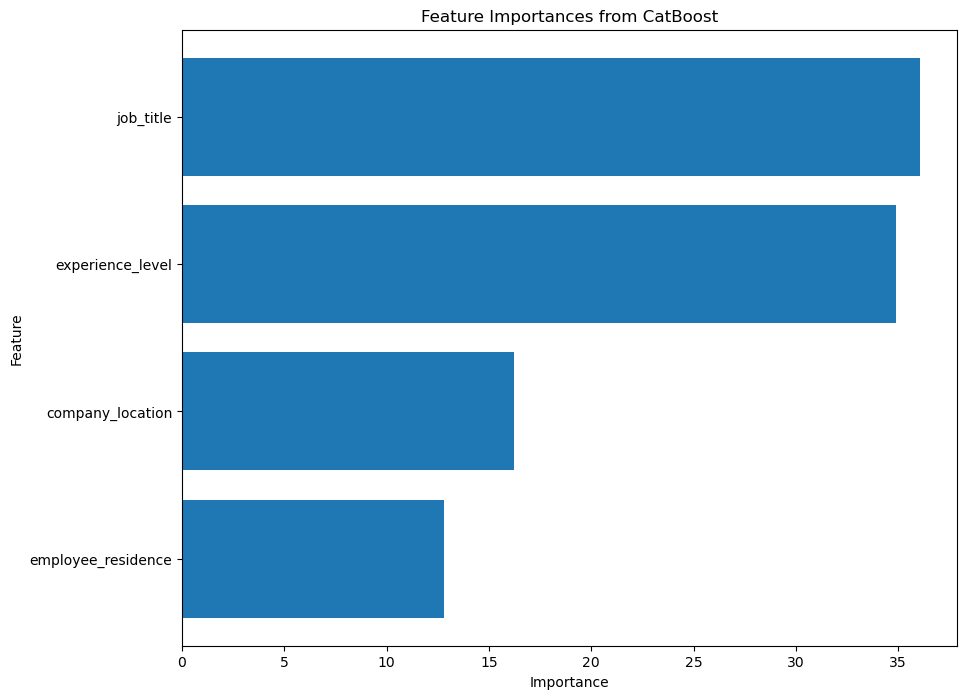

In [96]:
# Feature importances
feature_importances = best_cb_model.feature_importances_
feature_names = X_train.columns  # Original feature names

# Combine into a DataFrame 
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot 
plt.figure(figsize=(10, 8))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances from CatBoost")
plt.gca().invert_yaxis()
plt.show()

In [97]:
# Save the best model
#joblib.dump(best_cb_model, 'best_cb_model_3qua.pkl')  